🔹 Accuracy: 1.0

🔹 Confusion Matrix:
 [[1 0]
 [0 1]]

🔹 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



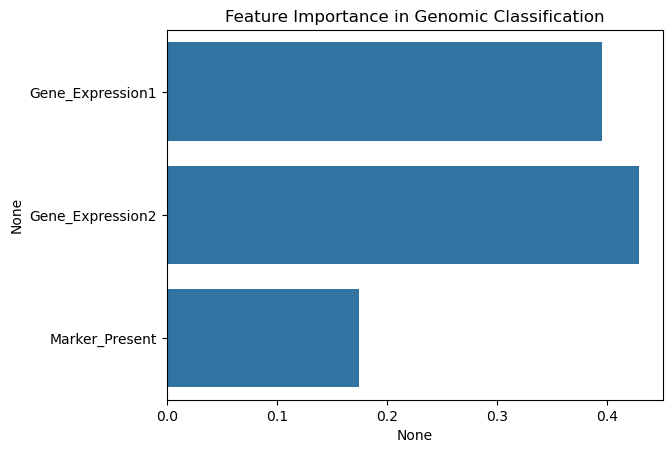

In [5]:
# PRACTICAL 5 - MACHINE LEARNING FOR GENOMIC DATA

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# Step 2: Create a sample genomic dataset
data = {
    'Gene_Expression1': [2.5, 3.0, 1.2, 5.6, 4.8, 2.9, 1.5, 6.1],
    'Gene_Expression2': [1.8, 2.2, 0.9, 5.0, 4.5, 2.5, 1.0, 5.5],
    'Marker_Present': ['Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes'],
    'Class': ['Healthy', 'Healthy', 'Diseased', 'Diseased', 'Healthy', 'Diseased', 'Diseased', 'Healthy']
}
df = pd.DataFrame(data)

# Step 3: Encode categorical data
le = LabelEncoder()
df['Marker_Present'] = le.fit_transform(df['Marker_Present'])
df['Class'] = le.fit_transform(df['Class'])

# Step 4: Split data
X = df[['Gene_Expression1', 'Gene_Expression2', 'Marker_Present']]
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Step 5: Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 6: Predict and evaluate
y_pred = model.predict(X_test)

print("🔹 Accuracy:", accuracy_score(y_test, y_pred))
print("\n🔹 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))

# Step 7: Feature Importance
import matplotlib.pyplot as plt
import seaborn as sns

importance = pd.Series(model.feature_importances_, index=X.columns)
sns.barplot(x=importance, y=importance.index)
plt.title("Feature Importance in Genomic Classification")
plt.show()
